In [1]:
from pulp import *
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np

 ## 1.

In [2]:
## add parameters
W = [
    [5, 3, 0, 0], 
    [0, 1, 8, 4]
    ]

V = [
    [0, 6],
    [6, 0]
    ]

A = [0, 4, 6, 10]
B = [2, 0, 8, 4]

M_INDEX = [0, 1, 2, 3]
N_INDEX = [0, 1]


 ### (a)
 #### 因 X、Y 軸互相獨立，所以可以分別建立模型後，再將結果相加(以下的 $x$ 代換為 $y$ 後，即為在 $y$ 軸上的運算)
 #### Linear Form
 ##### Decision Variables
 $x_j, \forall j \in \text{facilities}$: 新據點的$x$軸座標  
 $p_{jk}$: 新據點$j$到新據點$k$在$x$軸上的左邊幾單位  
 $q_{jk}$: 新據點$j$到新據點$k$在$x$軸上的右邊幾單位  
 $r_{ji}$: 新據點$j$到舊據點$i$在$x$軸上的右邊幾單位  
 $s_{ji}$: 新據點$j$到舊據點$i$在$x$軸上的左邊幾單位  
 ##### Model
 $\text{min}  \displaystyle{\sum_{1 \leq j < k \leq n} v_{jk} (p_{jk} + q_{jk}) + \sum_{j=1}^{n} \sum_{i=1}^{m}w_{ji}(r^X_{ji} + s^X_{ji})}$  
 $\text{s.t.}$  
 $x_j - q_{jk} + p_{jk} = x_k, 1 \leq j < k \leq n$  
 $x_j - r_{ji} + s_{ji} = a_i, 1 \leq i \leq m, 1 \leq j \leq n$  
 $x_j, x_k, r_{ji}, s_{ji}, q_{jk}, p_{jk} \geq 0, \forall j \in \text{facilities}$  
 ### (b)

In [4]:
def prob_sep(prob_name="problem_s", axis=0):
    if axis:
        a = B
    else:
        a = A
    ## problem
    prob = LpProblem("%s" %prob_name, LpMinimize)

    ## add variables
    p = []
    p.append(LpVariable.dicts(name="p0", indexs=N_INDEX, lowBound=0, upBound=None, cat="continuous"))
    p.append(LpVariable.dicts(name="p1", indexs=N_INDEX, lowBound=0, upBound=None, cat="continuous"))
    q = []
    q.append(LpVariable.dicts(name="q0", indexs=N_INDEX, lowBound=0, upBound=None, cat="continuous"))
    q.append(LpVariable.dicts(name="q1", indexs=N_INDEX, lowBound=0, upBound=None, cat="continuous"))
    x = LpVariable.dicts(name="x", indexs=N_INDEX, lowBound=0, upBound=None, cat="continuous")
    r = []
    r.append(LpVariable.dicts(name="r0", indexs=M_INDEX, lowBound=0, upBound=None, cat="continuous"))
    r.append(LpVariable.dicts(name="r1", indexs=M_INDEX, lowBound=0, upBound=None, cat="continuous"))
    s = []
    s.append(LpVariable.dicts(name="s0", indexs=M_INDEX, lowBound=0, upBound=None, cat="continuous"))
    s.append(LpVariable.dicts(name="s1", indexs=M_INDEX, lowBound=0, upBound=None, cat="continuous"))


    ## objective function
    prob += lpSum(
        [V[j][k] * (p[j][k] + q[j][k]) for j in N_INDEX for k in N_INDEX if j < k]
        ) + lpSum(
        [W[j][i] * (r[j][i] + s[j][i]) for i in M_INDEX for j in N_INDEX]
        )

    ## constraints
    for j in N_INDEX:
        for k in N_INDEX:
            if j < k:
                prob += x[j] - q[j][k] + p[j][k] == x[k]
    for i in M_INDEX:
        for j in N_INDEX:
            prob += a[i] == x[j] - r[j][i] + s[j][i]

    ## solve
    prob.solve()
    return prob

In [5]:
def prob_result(prob):
    print("Status for %s:" %prob.name, LpStatus[prob.status])
    target = []
    #印出解及目標值
    for v in prob.variables():
        print(v.name, "=", v.varValue)
        if "x" in v.name:
            target.append(v.varValue)
    print("---")
    print('obj=',value(prob.objective))
    return target

In [6]:
## 1b
prob_x = prob_sep(prob_name="1b_x", axis=0)
xs = prob_result(prob=prob_x)
print("\n\n------------\n\n")
prob_y = prob_sep(prob_name="1b_y", axis=1)
ys = prob_result(prob=prob_y)


Status for 1b_x: Optimal
p0_1 = 2.0
q0_1 = 0.0
r0_0 = 4.0
r0_1 = 0.0
r0_2 = 0.0
r0_3 = 0.0
r1_0 = 6.0
r1_1 = 2.0
r1_2 = 0.0
r1_3 = 0.0
s0_0 = 0.0
s0_1 = 0.0
s0_2 = 2.0
s0_3 = 6.0
s1_0 = 0.0
s1_1 = 0.0
s1_2 = 0.0
s1_3 = 4.0
x_0 = 4.0
x_1 = 6.0
---
obj= 50.0


------------


Status for 1b_y: Optimal
p0_1 = 2.0
q0_1 = 0.0
r0_0 = 0.0
r0_1 = 2.0
r0_2 = 0.0
r0_3 = 0.0
r1_0 = 2.0
r1_1 = 4.0
r1_2 = 0.0
r1_3 = 0.0
s0_0 = 0.0
s0_1 = 0.0
s0_2 = 6.0
s0_3 = 2.0
s1_0 = 0.0
s1_1 = 0.0
s1_2 = 4.0
s1_3 = 0.0
x_0 = 2.0
x_1 = 4.0
---
obj= 54.0


In [7]:
for j in N_INDEX:
    print("new facility {} located at: ({}, {})".format(j+1, xs[j], ys[j]))

print("objective value:", 104)

new facility 1 located at: (4.0, 2.0)
new facility 2 located at: (6.0, 4.0)
objective value: 104


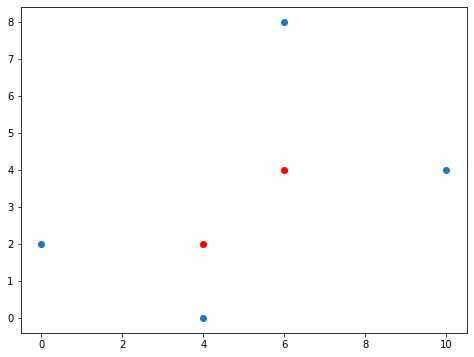

藍色的點是舊的據點，紅色是新的


In [8]:
## 1c
plt.figure(figsize=(8, 6))
plt.scatter(A, B)
plt.scatter(xs, ys, c="r")
plt.show()
print("藍色的點是舊的據點，紅色是新的")


 ## 2.
 ### (a)
 令在$x$右邊的點的集合為$R$，在$x$左邊的點的集合為$L$，$W_i$為到點$i$的權重  
 則$x$每向右$1$單位，相對於每個在右處的點的距離都會下降$1$單位、每個在左處的點的距離都會上升$1$單位，  
 根據斜率的定義：  
 $x$每向右一單位，$f(x)$的改變量
 可以得知，以每個點的相對改變量乘上$W_i$的和就是斜率： 
 $$\displaystyle{\text{slope} = \sum_{i \in L}W_i - \sum_{i \in R}W_i}$$

 ### (b)
 因為這是一個 convex function，亦即函數上的任意兩點連線段必在函數的上方，所以最佳解所在的位置會在斜率的正負號轉折之處(Optimality properties is because of the convexity of the function)，綜合(a)題的結論，我們知道函數的最低點必定是向右的weight與向左的weight抵銷到為$0$的情況，也就是在這個點才會發生斜率的正負號轉折。

 ## 3.
 4個長為8寬為16、5個長為9寬為9、3個長為18寬為3的長方形
 ### (a)


 #### Variables
 $x$：總所需面積的$x$軸長度  
 $y$：總所需面積的$y$軸長度  
 $x_i^\prime$：長方形$i$的中心點和原點沿著$x$軸的距離，$i \in \text{rectangles}$  
 $y_i^\prime$：長方形$i$的中心點和原點沿著$y$軸的距離，$i \in \text{rectangles}$  
 $s_i$：長方形$i$的方向，$1$為$p$軸平行$x$軸，$0$為$p$軸平行$y$軸，$i \in \text{rectangles}$  
 $u_{ik}, v_{ik}$：分別表示長方形$i$與長方形$k$之間的平行與垂直相對位置，$i, k \in \text{rectangles}, i \neq k$  
 $\alpha^X_j, \beta^X_j$：對$\text{ln }x$線性化所需的變數，$2 \leq j \leq m^X$  
 $\alpha^Y_j, \beta^Y_j$：對$\text{ln }y$線性化所需的變數，$2 \leq j \leq m^Y$  


 #### Model
 $\displaystyle{\text{min } \text{ln }a_1 + t^X_1(x - a_1) + \sum_{j=2}^{m^X-1}(t^X_j - t^X_{j-1})(a_j \alpha^X_j + x - a_j - \beta^X_j) + \text{ln }b_1 + t^Y_1(y - b_1) + \sum_{j=2}^{m^Y-1}(t^Y_j - t^Y_{j-1})(b_j \alpha^Y_j + y - b_j - \beta^Y_j)}$  
 
 $\text{s.t.}$  
 $$- \bar{x} \alpha^X_j \leq x - a_j \leq \bar{x}(1 - \alpha^X_j)$$
 $$- \bar{x} \alpha^X_j \leq \beta^X_j \leq \bar{x} \alpha^X_{j} $$
 $$\bar{x} (\alpha^X_j - 1) + x \leq \beta^X_j \leq \bar{x} (1 - \alpha^X_j) + x $$
 $$\alpha^X_j \leq \alpha^X_{j-1}$$
 $$\forall 2 \leq j \leq m^X$$

 $$- \bar{y} \alpha^Y_j \leq y - b_j \leq \bar{y}(1 - \alpha^Y_j)$$
 $$- \bar{y} \alpha^Y_j \leq \beta^Y_j \leq \bar{y} \alpha^Y_{j} $$
 $$\bar{y} (\alpha^Y_j - 1) + y \leq \beta^Y_j \leq \bar{y} (1 - \alpha^Y_j) + y $$
 $$\alpha^Y_j \leq \alpha^Y_{j-1}$$
 $$\forall 2 \leq j \leq m^Y$$  

 $$(x^\prime_i - x^\prime_k) + u_{ik} \bar{x} + v_{ik} \bar{x} \geq \frac{1}{2} (p_i s_i + q_i (1-s_i) + p_k s_k + q_k (1-s_k)), \forall i,k \in \text{rectangles} $$  
 $$(x^\prime_k - x^\prime_i) + (1 - u_{ik}) \bar{x} + v_{ik} \bar{x} \geq \frac{1}{2} (p_i s_i + q_i (1-s_i) + p_k s_k + q_k (1-s_k)), \forall i,k \in \text{rectangles} $$  
 $$(y^\prime_i - y^\prime_k) + u_{ik} \bar{y} + (1 - v_{ik}) \bar{y} \geq \frac{1}{2} (p_i (1 - s_i) + q_i s_i + p_k (1 - s_k) + q_k s_k), \forall i,k \in \text{rectangles} $$  
 $$(y^\prime_k - y^\prime_i) + (1 - u_{ik}) \bar{y} + (1 - v_{ik}) \bar{y} \geq \frac{1}{2} (p_i (1 - s_i) + q_i s_i + p_k (1 - s_k) + q_k s_k), \forall i,k \in \text{rectangles} $$  

 $$\bar{x} \geq x \geq x^\prime_i + \frac{1}{2}(p_i s_i + q_i (1-s_i)), \forall i \in \text{rectangles} $$
 $$\bar{y} \geq y \geq y^\prime_i + \frac{1}{2}(p_i (1-s_i) + q_i s_i), \forall i \in \text{rectangles} $$
 $$x^\prime_i - \frac{1}{2}(p_i s_i + q_i (1-s_i)) \geq 0, \forall i \in \text{rectangles} $$
 $$y^\prime_i - \frac{1}{2}(p_i (1-s_i) + q_i s_i) \geq 0, \forall i \in \text{rectangles} $$




 $$s_i, u_{ik}, v_{ik}, \alpha^X_j, \alpha^Y_j \in \{0, 1\}, \text{else all varialbes} \geq 0$$


 ### (b)

In [9]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np
P = [8] * 4 + [9] * 5 + [18] * 3
Q = [16] * 4 + [9] * 5 + [3] * 3
X_BAR = 18 * 3 + 9 * 5 + 16 * 4
Y_BAR = 18 * 3 + 9 * 5 + 16 * 4

J = len(P)
M_X = 25
M_Y = 25



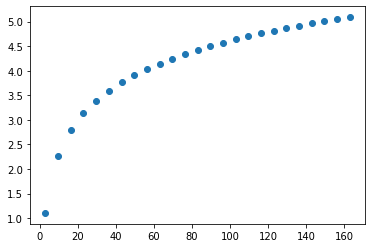

In [10]:
A = list()
ln_A = list()
for _ in np.linspace(3, X_BAR, num=M_X):
    A.append(_)
    ln_A.append(math.log(_))

B = list()
ln_B = list()
for _ in np.linspace(3, Y_BAR, num=M_Y):
    B.append(_)
    ln_B.append(math.log(_))

SLOPE_X = list()
for j in range(0, M_X-1):
    SLOPE_X.append((ln_A[j+1] - ln_A[j]) / (A[j+1] - A[j]))

SLOPE_Y = list()
for j in range(0, M_Y-1):
    SLOPE_Y.append((ln_B[j+1] - ln_B[j]) / (B[j+1] - B[j]))

plt.scatter(A, ln_A)




In [11]:
prob_3 = gp.Model("cutting_stock")

Using license file C:\Users\user\gurobi.lic
Academic license - for non-commercial use only


In [12]:
x = prob_3.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x")
y = prob_3.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y")
x_prime = prob_3.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x_prime")
y_prime = prob_3.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y_prime")
s = prob_3.addVars(J, vtype=GRB.BINARY, name="s")
u = prob_3.addVars(J, J, vtype=GRB.BINARY, name="u")
v = prob_3.addVars(J, J, vtype=GRB.BINARY, name="v")
r_x = prob_3.addVars(M_X, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="r_x")
r_y = prob_3.addVars(M_Y, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="r_y")
w_x = prob_3.addVars(M_X, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="w_x")
w_y = prob_3.addVars(M_Y, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="w_y")



In [13]:
prob_3.setObjective(
    ln_A[0] + SLOPE_X[0] * (x - A[0]) + \
    gp.quicksum((SLOPE_X[j] - SLOPE_X[j-1]) * (A[j] * r_x[j] + x - A[j] - w_x[j]) for j in range(1, M_X-1)) + \
    ln_B[0] + SLOPE_Y[0] * (y - B[0]) + \
    gp.quicksum((SLOPE_Y[j] - SLOPE_Y[j-1]) * (B[j] * r_y[j] + y - B[j] - w_y[j]) for j in range(1, M_Y-1))
)



In [23]:
prob_3.addConstrs(-X_BAR * r_x[j] <= x - A[j] for j in range(1, M_X))
prob_3.addConstrs(x - A[j] <= X_BAR * (1 - r_x[j]) for j in range(1, M_X))
prob_3.addConstrs(-X_BAR * r_x[j] <= w_x[j] for j in range(1, M_X))
prob_3.addConstrs(w_x[j] <= X_BAR * r_x[j] for j in range(1, M_X))
prob_3.addConstrs(X_BAR * (r_x[j] - 1) + x <= w_x[j] for j in range(1, M_X))
prob_3.addConstrs(w_x[j] <= X_BAR * (1 - r_x[j]) + x for j in range(1, M_X))
prob_3.addConstrs(r_x[j] >= r_x[j-1] for j in range(1, M_X))



prob_3.addConstrs(-Y_BAR * r_y[j] <= y - B[j] for j in range(1, M_Y))
prob_3.addConstrs(y - B[j] <= Y_BAR * (1 - r_y[j]) for j in range(1, M_Y))
prob_3.addConstrs(-Y_BAR * r_y[j] <= w_y[j] for j in range(1, M_Y))
prob_3.addConstrs(w_y[j] <= Y_BAR * r_y[j] for j in range(1, M_Y))
prob_3.addConstrs(Y_BAR * (r_y[j] - 1) + y <= w_y[j] for j in range(1, M_Y))
prob_3.addConstrs(w_y[j] <= Y_BAR * (1 - r_y[j]) + y for j in range(1, M_Y))
prob_3.addConstrs(r_y[j] >= r_y[j-1] for j in range(1, M_Y))




prob_3.addConstrs(
    (x_prime[i] - x_prime[k]) + u[i,k] * X_BAR + v[i,k] * X_BAR >= \
    0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
    for i in range(J) for k in range(J) if i != k
    )


prob_3.addConstrs(
    (x_prime[k] - x_prime[i]) + (1 - u[i,k]) * X_BAR + v[i,k] * X_BAR >= \
    0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
    for i in range(J) for k in range(J) if i != k
    )

prob_3.addConstrs(
    (y_prime[i] - y_prime[k]) + u[i,k] * Y_BAR + (1 - v[i,k]) * Y_BAR >= \
    0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
    for i in range(J) for k in range(J) if i != k
    )

prob_3.addConstrs(
    (y_prime[k] - y_prime[i]) + (1 - u[i,k]) * Y_BAR + (1 - v[i,k]) * Y_BAR >= \
    0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
    for i in range(J) for k in range(J) if i != k
    )

prob_3.addConstr(X_BAR >= x)
prob_3.addConstrs(x >= x_prime[i] + 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) for i in range(J))
prob_3.addConstr(Y_BAR >= y)
prob_3.addConstrs(y >= y_prime[i] + 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) for i in range(J))

prob_3.addConstrs(x_prime[i] - 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) >= 0 for i in range(J))
prob_3.addConstrs(y_prime[i] - 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) >= 0 for i in range(J))



{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>}

In [24]:
prob_3.write('q3.lp')

prob_3.optimize()


Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 1828 rows, 426 columns and 7196 nonzeros
Model fingerprint: 0xed941c2e
Variable types: 76 continuous, 350 integer (350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [3e-04, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+02]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R1226 by 1.000000000

Presolve removed 1258 rows and 127 columns
Presolve time: 0.01s
Presolved: 570 rows, 299 columns, 2826 nonzeros
Variable types: 26 continuous, 273 integer (273 binary)

Root relaxation: objective 4.417979e+00, 196 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    4.41798    0  140          -    4.41798      -     -    0s
H    0     0              

 ### (c)

4.0 7.999999999999943
4.0 23.999999999989015
4.0 39.999999999976815
4.0 55.99999999996783
4.5 68.4999999999562
4.5 77.49999999994921
4.5 86.49999999994279
4.5 95.49999999993409
4.5 104.49999999992636
1.5 117.99999999991908
4.499999999999746 117.9999999999192
7.49999999999952 117.99999999991942


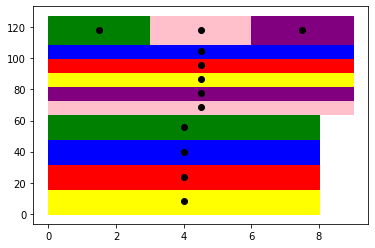

In [25]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
colors = ['yellow', 'red', 'blue', 'green', 'pink', 'purple']
xs = list()
ys = list()
for j in range(J):
    center_x, center_y = prob_3.getAttr('x', x_prime)[j], prob_3.getAttr('x', y_prime)[j]
    print(center_x, center_y)
    xs.append(center_x)
    ys.append(center_y)
    if prob_3.getAttr('x', s)[j] == 1: # p和x平行
        corner_x = center_x - 0.5 * P[j]
        corner_y = center_y - 0.5 * Q[j]
        ax.add_patch(Rectangle((corner_x, corner_y), P[j], Q[j], color=colors[j % len(colors)]))
    else: # p和y平行
        corner_x = center_x - 0.5 * Q[j]
        corner_y = center_y - 0.5 * P[j]
        ax.add_patch(Rectangle((corner_x, corner_y), Q[j], P[j], color=colors[j % len(colors)]))
    # break
ax.scatter(xs, ys, c='black', zorder=100)


 ### (d)

In [26]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np
import time 



In [27]:
def q3_4(resolution):
    start = time.time()
    P = [8] * 4 + [9] * 5 + [18] * 3
    Q = [16] * 4 + [9] * 5 + [3] * 3
    x_bar = 18 * 3 + 9 * 5 + 16 * 4
    y_bar = 18 * 3 + 9 * 5 + 16 * 4

    J = len(P)
    m_X = resolution
    m_Y = resolution

    a = list()
    ln_a = list()
    for _ in np.linspace(3, x_bar, num=m_X):
        a.append(_)
        ln_a.append(math.log(_))

    b = list()
    ln_b = list()
    for _ in np.linspace(3, y_bar, num=m_Y):
        b.append(_)
        ln_b.append(math.log(_))

    t_X = list()
    for j in range(0, m_X-1):
        t_X.append((ln_a[j+1] - ln_a[j]) / (a[j+1] - a[j]))

    t_Y = list()
    for j in range(0, m_Y-1):
        t_Y.append((ln_b[j+1] - ln_b[j]) / (b[j+1] - b[j]))







    model = gp.Model("cutting_stock")
    x = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x")
    y = model.addVar(lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y")
    x_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="x_prime")
    y_prime = model.addVars(J, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="y_prime")
    s = model.addVars(J, vtype=GRB.BINARY, name="s")
    u = model.addVars(J, J, vtype=GRB.BINARY, name="u")
    v = model.addVars(J, J, vtype=GRB.BINARY, name="v")
    alpha_X = model.addVars(m_X, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_X")
    alpha_Y = model.addVars(m_Y, lb=0.0, ub=1.0, vtype=GRB.BINARY, name="alpha_Y")
    beta_X = model.addVars(m_X, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_X")
    beta_Y = model.addVars(m_Y, lb=0.0, ub=float('inf'), vtype=GRB.CONTINUOUS, name="beta_Y")

    model.setObjective(
        ln_a[0] + t_X[0] * (x - a[0]) + \
        gp.quicksum((t_X[j] - t_X[j-1]) * (a[j] * alpha_X[j] + x - a[j] - beta_X[j]) for j in range(1, m_X-1)) + \
        ln_b[0] + t_Y[0] * (y - b[0]) + \
        gp.quicksum((t_Y[j] - t_Y[j-1]) * (b[j] * alpha_Y[j] + y - b[j] - beta_Y[j]) for j in range(1, m_Y-1))
    )

    model.addConstrs(-x_bar * alpha_X[j] <= x - a[j] for j in range(1, m_X))
    model.addConstrs(x - a[j] <= x_bar * (1 - alpha_X[j]) for j in range(1, m_X))
    model.addConstrs(-x_bar * alpha_X[j] <= beta_X[j] for j in range(1, m_X))
    model.addConstrs(beta_X[j] <= x_bar * alpha_X[j] for j in range(1, m_X))
    model.addConstrs(x_bar * (alpha_X[j] - 1) + x <= beta_X[j] for j in range(1, m_X))
    model.addConstrs(beta_X[j] <= x_bar * (1 - alpha_X[j]) + x for j in range(1, m_X))
    model.addConstrs(alpha_X[j] >= alpha_X[j-1] for j in range(1, m_X))



    model.addConstrs(-y_bar * alpha_Y[j] <= y - b[j] for j in range(1, m_Y))
    model.addConstrs(y - b[j] <= y_bar * (1 - alpha_Y[j]) for j in range(1, m_Y))
    model.addConstrs(-y_bar * alpha_Y[j] <= beta_Y[j] for j in range(1, m_Y))
    model.addConstrs(beta_Y[j] <= y_bar * alpha_Y[j] for j in range(1, m_Y))
    model.addConstrs(y_bar * (alpha_Y[j] - 1) + y <= beta_Y[j] for j in range(1, m_Y))
    model.addConstrs(beta_Y[j] <= y_bar * (1 - alpha_Y[j]) + y for j in range(1, m_Y))
    model.addConstrs(alpha_Y[j] >= alpha_Y[j-1] for j in range(1, m_Y))




    model.addConstrs(
        (x_prime[i] - x_prime[k]) + u[i,k] * x_bar + v[i,k] * x_bar >= \
        0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
        for i in range(J) for k in range(J) if i != k
        )


    model.addConstrs(
        (x_prime[k] - x_prime[i]) + (1 - u[i,k]) * x_bar + v[i,k] * x_bar >= \
        0.5 * (P[i] * s[i] + Q[i] * (1 - s[i]) + P[k] * s[k] + Q[k] * (1 - s[k])) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstrs(
        (y_prime[i] - y_prime[k]) + u[i,k] * y_bar + (1 - v[i,k]) * y_bar >= \
        0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstrs(
        (y_prime[k] - y_prime[i]) + (1 - u[i,k]) * y_bar + (1 - v[i,k]) * y_bar >= \
        0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i] + P[k] * (1 - s[k]) + Q[k] * s[k]) \
        for i in range(J) for k in range(J) if i != k
        )

    model.addConstr(x_bar >= x)
    model.addConstrs(x >= x_prime[i] + 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) for i in range(J))
    model.addConstr(y_bar >= y)
    model.addConstrs(y >= y_prime[i] + 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) for i in range(J))

    model.addConstrs(x_prime[i] - 0.5 * (P[i] * s[i] + Q[i] * (1 - s[i])) >= 0 for i in range(J))
    model.addConstrs(y_prime[i] - 0.5 * (P[i] * (1 - s[i]) + Q[i] * s[i]) >= 0 for i in range(J))

    model.optimize()
    print("objective value:", model.objVal)
    return model.objVal, time.time() - start



In [ ]:
objs = list()
times = list()
for resolution in range(25, 30, 1):
    obj, t = q3_4(resolution)
    objs.append(obj)
    times.append(t)




Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 914 rows, 426 columns and 3598 nonzeros
Model fingerprint: 0x39619473
Variable types: 76 continuous, 350 integer (350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [3e-04, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+02]
Found heuristic solution: objective 7.6305007
Presolve removed 74 rows and 37 columns
Presolve time: 0.02s
Presolved: 840 rows, 389 columns, 3634 nonzeros
Variable types: 72 continuous, 317 integer (317 binary)

Root relaxation: objective 1.859137e+00, 207 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.85914    0  183    7.63050    1.85914  75.6%     -    0s
H    0     0                       7.4718609    1.85914  75.1%     -    0s
H    0     0                       7.2023176    1.859

 **隨著num of break point上升得到的objective value，x軸由25起算
 隨著對ln的精準度越高，objective value上升，因為原本用內插法就會低估了。**


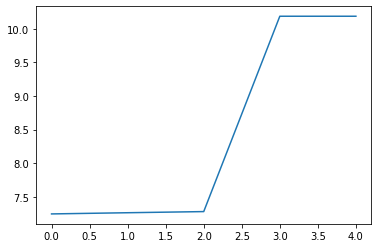

In [20]:
plt.plot(objs)


 **隨著num of break point上升得到的execute time，x軸由25起算
 隨著對ln的精準度越高，執行速度變得更快。**


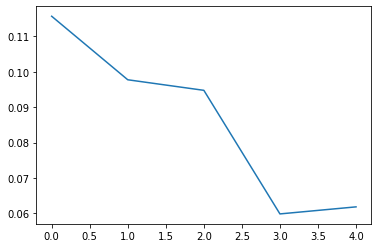

In [21]:
plt.plot(times)



In [22]:
times

[0.11569046974182129,
 0.09773898124694824,
 0.09475517272949219,
 0.05983090400695801,
 0.06182360649108887]